In [ ]:
import tensorflow as tf

print(tf.__version__)

2.6.0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print("X Train Shape : {}".format(X_train.shape))
print("Y Train Shape : {}".format(y_train.shape))
print()
print("X Test Shape : {}".format(X_test.shape))
print("Y Test Shape : {}".format(y_test.shape))

X Train Shape : (60000, 28, 28)
Y Train Shape : (60000,)

X Test Shape : (10000, 28, 28)
Y Test Shape : (10000,)


In [ ]:
print("X Train Max : {}".format(X_train.max()))
print("X Train Min : {}".format(X_train.min()))
print()
print("X Test Max : {}".format(X_test.max()))
print("X Test Min : {}".format(X_test.min()))

X Train Max : 255
X Train Min : 0

X Test Max : 255
X Test Min : 0


In [ ]:
class_names = ["T-shirt/Top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]
len(class_names)

10

In [ ]:
def img(X,y,index):
    plt.figure(figsize = (15,6))
    plt.imshow(X[index])
    plt.colorbar()
    plt.title(class_names[y[index]], fontsize = 15)
    plt.axis("off")
    plt.show()

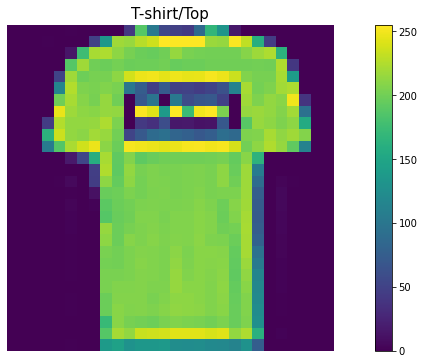

In [ ]:
img(X_train, y_train, index = 1)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255 

print("X Train Max : {}".format(X_train_scaled.max()))
print("X Train Min : {}".format(X_train_scaled.min()))
print()
print("X Test Max : {}".format(X_test_scaled.max()))
print("X Test Min : {}".format(X_test_scaled.min()))

X Train Max : 1.0
X Train Min : 0.0

X Test Max : 1.0
X Test Min : 0.0


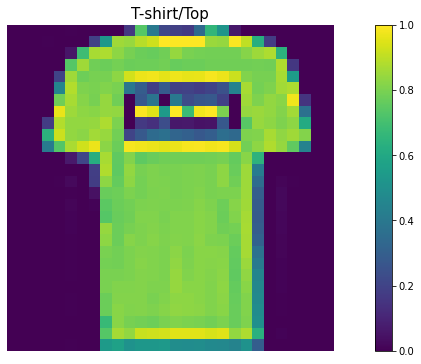

In [ ]:
img(X_train_scaled, y_train, index = 1)

In [ ]:
print("X Train Shape : {}".format(X_train_scaled.shape))
print()
print("X Test Shape : {}".format(X_test_scaled.shape))

X Train Shape : (60000, 28, 28)

X Test Shape : (10000, 28, 28)


# Build Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Nereden Geldi 784,100480,1290 !

Flatten = 28*28
Flatten

784

In [ ]:
Dense_0 = Flatten * 128
Dense_0 + 128

100480

In [ ]:
Dense_1 = 128 * 10
Dense_1 + 10

1290

In [ ]:
model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs = 10, validation_data = (X_test_scaled, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5088 - accuracy: 0.8210 - val_loss: 0.4459 - val_accuracy: 0.8439
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3781 - accuracy: 0.8658 - val_loss: 0.3868 - val_accuracy: 0.8593
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3390 - accuracy: 0.8765 - val_loss: 0.3806 - val_accuracy: 0.8620
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3155 - accuracy: 0.8839 - val_loss: 0.3755 - val_accuracy: 0.8610
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.8916 - val_loss: 0.3421 - val_accuracy: 0.8792
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2812 - accuracy: 0.8974 - val_loss: 0.3765 - val_accuracy: 0.8650
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2715 - accuracy: 0.9000 - val_loss: 0.3406 - val_accuracy:

In [ ]:
def history_graph(history):

    plt.figure(figsize = (15,6))
    size = 15
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label = "Train")
    plt.plot(history.history["val_accuracy"], label = "Test")
    plt.legend(loc = "best")
    plt.title("Accuracy Graph", fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Accuracy Score", fontsize = size)

    plt.subplot(1,2,2)
    plt.plot(history.history["loss"],label = "Train")
    plt.plot(history.history["val_loss"], label = "Test")
    plt.legend(loc = "best")
    plt.title("Loss Graph", fontsize = size)
    plt.xlabel("Epochs", fontsize = size)
    plt.ylabel("Loss Score", fontsize = size)

    plt.tight_layout()
    plt.show()

In [ ]:
def confusion_graph(y_true, y_pred, classes = "auto"):

    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize = (15,6))
    sns.heatmap(cm, annot = True, cbar = False, cmap = "viridis", annot_kws= {"size" : 15}, fmt = "d", xticklabels=classes , yticklabels = classes )
    
    size = 15
    plt.xlabel("Predicted",fontsize = size)
    plt.ylabel("Actual", fontsize = size)
    plt.title("Confusion Matrix" , fontsize = size)

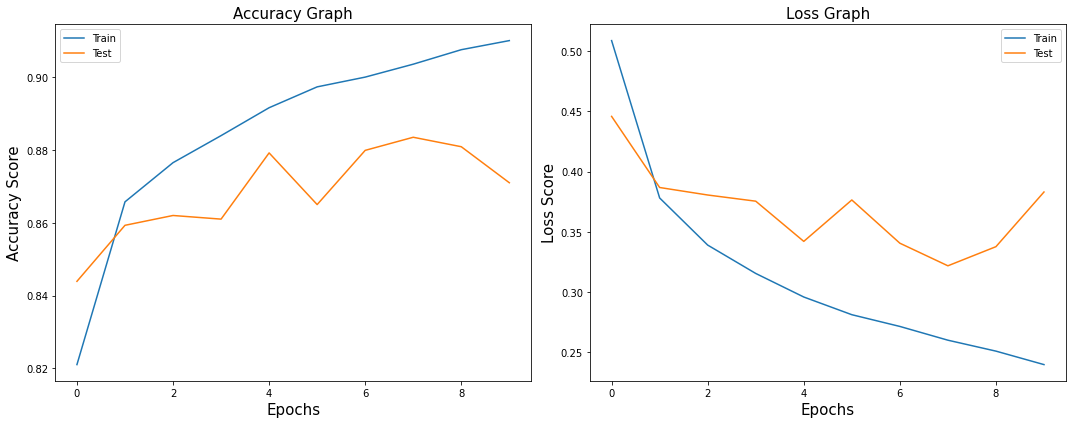

In [ ]:
history_graph(history)

In [ ]:
loss , accuracy = model.evaluate(X_test_scaled,y_test)
loss

313/313 [==============================] - 0s 1ms/step - loss: 0.3831 - accuracy: 0.8710


0.38309288024902344

In [ ]:
accuracy

0.8709999918937683

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred_max = [np.argmax(i) for i in y_pred]

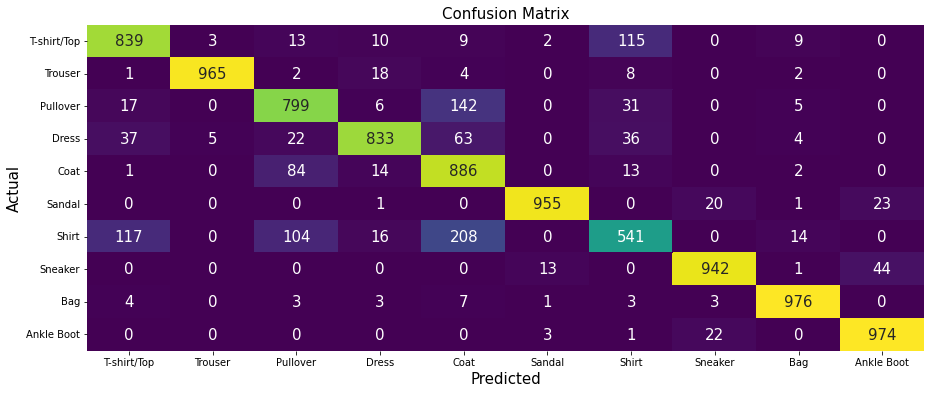

In [ ]:
confusion_graph(y_test, y_pred_max,classes=class_names)